### MONDAY

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
pd.options.display.max_rows = 100


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

In [2]:
customer_analysis = pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")

customer_analysis.head()

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize


### Check if there are highly correlated features and drop them if there are any.

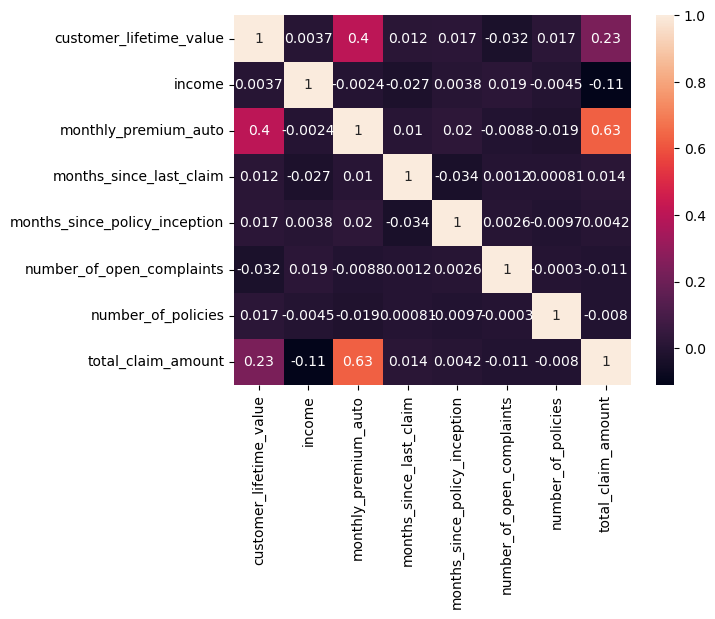

In [14]:
corr_matrix = customer_analysis.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

### One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 3. ( Hint: check Dropfirst option).

In [13]:
# Lets convert the dataframe into categorical and numerical columns

numerical = customer_analysis.select_dtypes(include=np.number)
categorical = customer_analysis.select_dtypes(include=object)

categorical

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [48]:
# To dummify the category variable by using one hot encoding for further analysis

nominal = categorical[["region", "response", "employment_status", "gender", "location_code", "marital_status", "policy_type", "policy", "sales_channel", "vehicle_class"]]

nominal = pd.get_dummies(nominal, drop_first=True)

nominal


,region_central,region_east,region_north west,region_west region,response_no,response_yes,employment_status_disabled,employment_status_employed,employment_status_medical leave,employment_status_retired,...,sales_channel_agent,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_four-door car,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car
0,1,0,0,0,1,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
1,0,0,0,1,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,0,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
10685,0,0,1,0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
10686,1,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
10687,0,0,0,1,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0


In [43]:
# To dummify the category variable by using ordinal encoding for further analysis

ordinal =  categorical [["coverage", "education", "effective_to_date", "month", "renew_offer_type", "vehicle_size"]]
ordinal["coverage"] = ordinal["coverage"].replace({"basic": 0, "extended": 1, "premium": 2})
ordinal["education"] = ordinal["coverage"].replace({"high school or below": 0, "college": 1, "bachelor": 2, "master": 3, "doctor": 3})
ordinal["month"] = ordinal["month"].replace({"jan": 0, "feb": 1})
ordinal["renew_offer_type"] = ordinal["renew_offer_type"].replace({"offer1": 0, "offer2": 1, "offer3": 2, "offer4": 3})
ordinal["vehicle_size"] = ordinal["vehicle_size"].replace({"small": 0, "medsize": 1, "large":2})

ordinal


/var/folders/v6/6m2bpdm12rn2zbd3w9c2c7q00000gn/T/ipykernel_13678/1344463628.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinal["coverage"] = ordinal["coverage"].replace({"basic": 0, "extended": 1, "premium": 2})
/var/folders/v6/6m2bpdm12rn2zbd3w9c2c7q00000gn/T/ipykernel_13678/1344463628.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinal["education"] = ordinal["coverage"].replace({"high school or below": 0, "college": 1, "bachelor": 2, "master": 3, "doctor": 3})
/var/folders/v6/6m2bpdm12rn2

,coverage,education,effective_to_date,month,renew_offer_type,vehicle_size
0,0,0,2/18/11,1,2,1
1,0,0,1/18/11,0,3,1
2,0,0,2/10/11,1,2,1
3,1,1,1/11/11,0,1,1
4,2,2,1/17/11,0,0,1
...,...,...,...,...,...,...
10684,2,2,1/19/11,0,2,1
10685,0,0,1/6/11,0,1,1
10686,1,1,2/6/11,1,0,1
10687,2,2,2/13/11,1,0,1


In [45]:
#ordinal["effective_to_date"].drop()

ordinal.drop(['effective_to_date'], axis=1)

,coverage,education,month,renew_offer_type,vehicle_size
0,0,0,1,2,1
1,0,0,0,3,1
2,0,0,1,2,1
3,1,1,0,1,1
4,2,2,0,0,1
...,...,...,...,...,...
10684,2,2,0,2,1
10685,0,0,0,1,1
10686,1,1,1,0,1
10687,2,2,1,0,1


## (Optional Task)

Begin by visually examining distributions (histograms) of the numerical features. Select a variable, call it varA, which takes on a wide range of numerical values, and another, varB, which has a noticeably large skew. For example, you might select customer_lifetime_value as a candidate varB which has skew.

In [46]:
from sklearn.preprocessing import PowerTransformer, StandardScaler, minmax_scale

array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:>]], dtype=object)

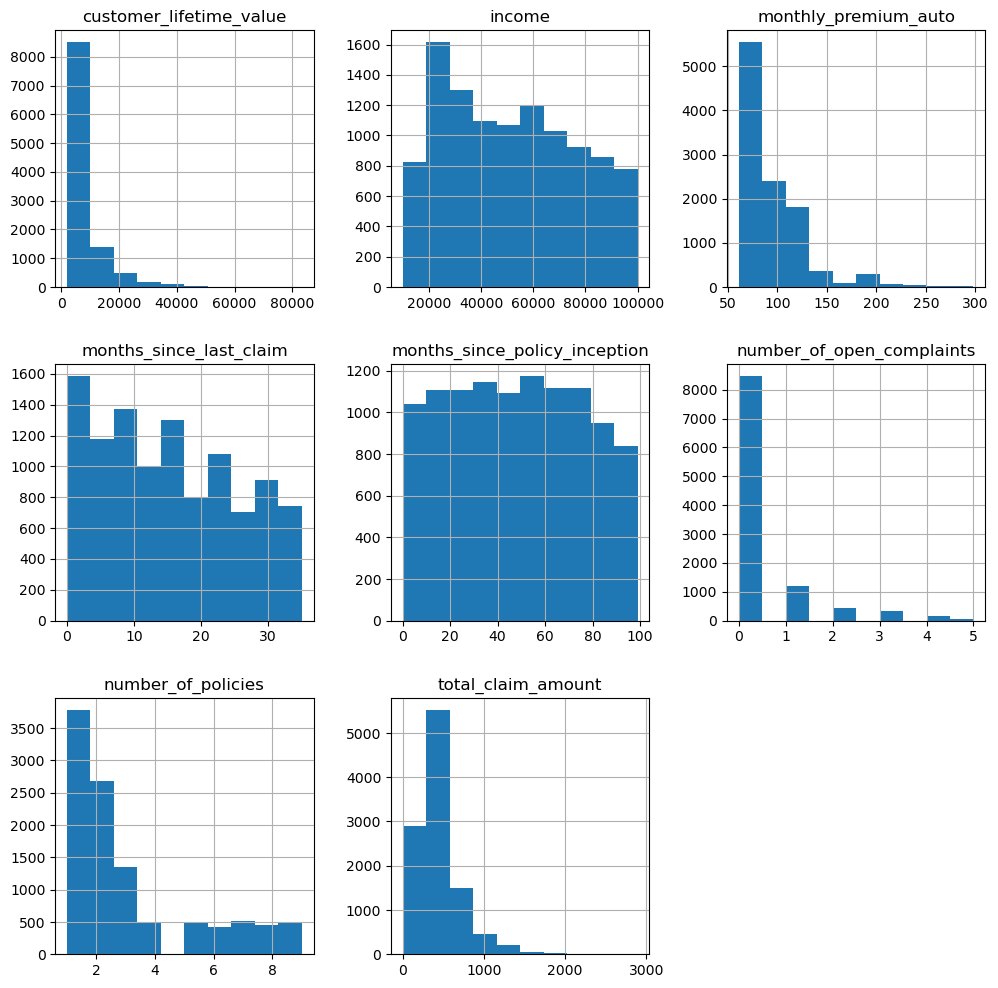

In [51]:
varA = numerical["income"]
varB  = numerical["customer_lifetime_value"]
numerical.hist(figsize=(12,12))

### varA
### Use minmax transform to bring varA's values into the range [0,1].

In [63]:
#scaler = MinMaxScale(feature_range=(0, 1))
#create a MinMaxScaler object
#scaler = MinMaxScaler()
#fit and transform the data
#scaled_data = scaler.fit_transform(data)
#scaler = MinMaxScaler(feature_range=(-1, 1))


#varA = minmax_scale(varA, feature_range=(0, 1))
#varA




### TUESDAY

### Linear Regression


In [64]:
numerical.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707


### X-y split (y is the target variable, which is the total claim amount)

In [66]:
X = numerical.drop(['total_claim_amount'], axis = 1)
y = numerical.total_claim_amount

### Train-test split.


In [67]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head(3)



,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
861,5908,86277,74,19,33,0,3
9053,2397,22283,65,16,93,0,1
9515,5296,96510,73,33,44,0,3


### Standardize the data (after the data split)

In [79]:
scaler = StandardScaler() #this is used to standardize features by removing the mean and scaling to unit variance.
X_trains = scaler.fit_transform(X_train) # The fit_transform() method first fits the scaler to the data (computes the mean and variance of each feature), and then applies the scaling transformation to the data.

 

In [80]:
X_tests = scaler.transform(X_test)

### Apply Linear Regression

In [81]:
X_train_const = sm.add_constant(X_trains) #In this line, a constant term is added to the training set of features 
#X_train using the add_constant() function from the statsmodels library. The reason for adding the constant term is to fit the y-intercept of the linear regression model.

model = sm.OLS(y_train, X_train_const).fit() #linear regression model is fitted using the Ordinary Least Squares 
#(OLS) method provided by the statsmodels library. The y_train variable is the target variable, while X_train_const is the set of features with a constant term added. The fit() method fits the linear regression model using the training data.


y_pred_train = model.predict(X_train_const) # the predict() method is used to generate the predicted values of the 
#target variable y for the training set X_train_const using the fitted linear regression model model.

X_test_const = sm.add_constant(X_tests) # In this line, a constant term is added to the testing set of features X_test
#using the add_constant() function from the statsmodels library. The constant term is added to ensure that the y-intercept is taken into account when predicting the target variable.

y_pred_test = model.predict(X_test_const) #In this line, the predict() method is used to generate the predicted values
#of the target variable y for the testing set X_test_const using the fitted linear regression model model.

### Model interpretation